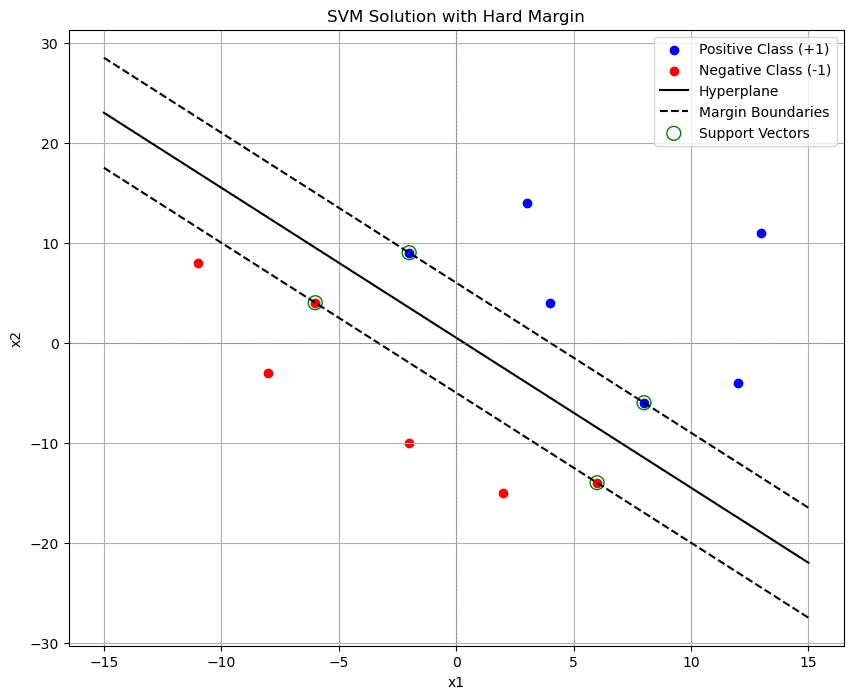

(array([0.27272727, 0.18181818]),
 np.float64(-0.09090909090909069),
 np.float64(6.1017021584775115),
 array([ 0,  3,  8, 11]))

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Training data (positive class +1 and negative class -1)
x_pos = np.array([[-2, 9], [3, 14], [4, 4], [8, -6], [12, -4], [13, 11]])
x_neg = np.array([[-11, 8], [-8, -3], [-6, 4], [-2, -10], [2, -15], [6, -14]])
#x_pos = np.array([[-2, 0]])
#x_neg = np.array([[0, 0], [0, -1]])
y_pos = np.ones(x_pos.shape[0])  # +1 class
y_neg = -np.ones(x_neg.shape[0])  # -1 class

# Combine data
X = np.vstack((x_pos, x_neg))
y = np.hstack((y_pos, y_neg))

# Define the QP problem matrices
n_samples, n_features = X.shape
P = np.block([[np.eye(n_features), np.zeros((n_features, 1))],
              [np.zeros((1, n_features)), 0]])
q = np.zeros(n_features + 1)

# Constraints: A and c
A = y[:, None] * np.hstack((X, np.ones((n_samples, 1))))
c = np.ones(n_samples)

# Define the QP solver objective and constraints
def objective(u):
    return 0.5 * np.dot(u.T, P @ u)

def constraint(u):
    return A @ u - c

# Initial guess
u0 = np.zeros(n_features + 1)

# Solve QP
constraints = [{'type': 'ineq', 'fun': lambda u: constraint(u)}]
result = minimize(objective, u0, constraints=constraints)

# Extract solution
w = result.x[:-1]
b = result.x[-1]
margin_width = 2 / np.linalg.norm(w)

# Identify support vectors
support_vectors = np.where(np.abs(A @ result.x - c) < 1e-6)[0]

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(x_pos[:, 0], x_pos[:, 1], color='blue', label='Positive Class (+1)')
plt.scatter(x_neg[:, 0], x_neg[:, 1], color='red', label='Negative Class (-1)')

# Plot hyperplane and margins
x_vals = np.linspace(-15, 15, 100)
y_hyperplane = (-b - w[0] * x_vals) / w[1]
y_margin1 = (-b - 1 - w[0] * x_vals) / w[1]
y_margin2 = (-b + 1 - w[0] * x_vals) / w[1]

plt.plot(x_vals, y_hyperplane, 'k-', label='Hyperplane')
plt.plot(x_vals, y_margin1, 'k--', label='Margin Boundaries')
plt.plot(x_vals, y_margin2, 'k--')

# Highlight support vectors
plt.scatter(X[support_vectors, 0], X[support_vectors, 1], s=100,
            facecolors='none', edgecolors='green', label='Support Vectors')

plt.title('SVM Solution with Hard Margin')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()

(w, b, margin_width, support_vectors)


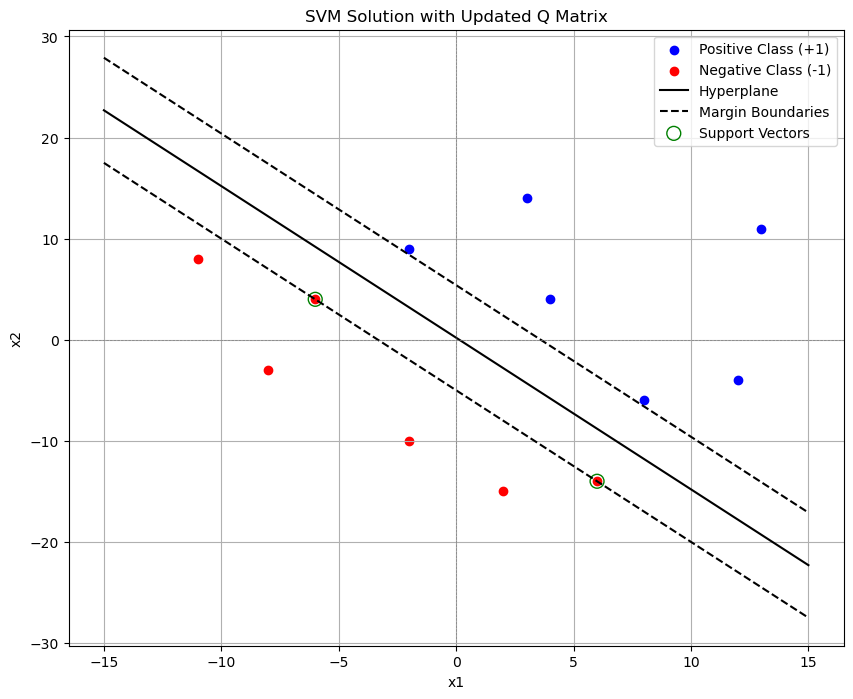

(array([0.28846154, 0.19230769]),
 np.float64(-0.03846154705064058),
 np.float64(5.768882092210521),
 array([ 8, 11]))

In [12]:
# Redefine Q matrix as specified
P = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

# Solve QP again with the updated Q matrix
def objective_updated(u):
    return 0.5 * np.dot(u.T, P @ u)

result_updated = minimize(objective_updated, u0, constraints=constraints)

# Extract solution
w_updated = result_updated.x[:-1]
b_updated = result_updated.x[-1]
margin_width_updated = 2 / np.linalg.norm(w_updated)

# Identify support vectors
support_vectors_updated = np.where(np.abs(A @ result_updated.x - c) < 1e-6)[0]

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(x_pos[:, 0], x_pos[:, 1], color='blue', label='Positive Class (+1)')
plt.scatter(x_neg[:, 0], x_neg[:, 1], color='red', label='Negative Class (-1)')

# Plot hyperplane and margins
y_hyperplane_updated = (-b_updated - w_updated[0] * x_vals) / w_updated[1]
y_margin1_updated = (-b_updated - 1 - w_updated[0] * x_vals) / w_updated[1]
y_margin2_updated = (-b_updated + 1 - w_updated[0] * x_vals) / w_updated[1]

plt.plot(x_vals, y_hyperplane_updated, 'k-', label='Hyperplane')
plt.plot(x_vals, y_margin1_updated, 'k--', label='Margin Boundaries')
plt.plot(x_vals, y_margin2_updated, 'k--')

# Highlight support vectors
plt.scatter(X[support_vectors_updated, 0], X[support_vectors_updated, 1], s=100,
            facecolors='none', edgecolors='green', label='Support Vectors')

plt.title('SVM Solution with Updated Q Matrix')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()

(w_updated, b_updated, margin_width_updated, support_vectors_updated)
